# Assignment-3 21BAI10250 Subhradip Bodhak

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Droping Unnecessary features

In [4]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Data Preprocessing

### Checking for null values

In [5]:
df.isnull().any()# checking for presence of null values

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [6]:
df.isnull().sum()# checking frequency of null values in each column

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df.shape

(891, 8)

<AxesSubplot: >

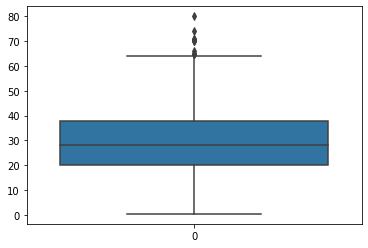

In [8]:
sns.boxplot(df.Age)#checking for outliers

As outliers are present we are going to impute missing age values using median

In [9]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [10]:
df.Age.isnull().any()

True

In [11]:
df['Age']=imp_median.fit_transform(df[['Age']])

In [12]:
df.Age.isnull().any()

False

## Data Visualization

<AxesSubplot: xlabel='Pclass', ylabel='count'>

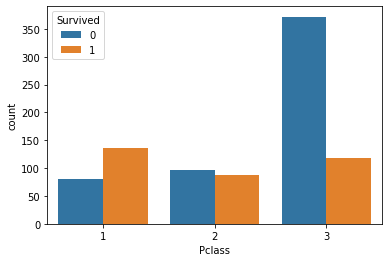

In [13]:
sns.countplot(data=df,x='Pclass',hue='Survived')

 The survival chances of a class-1 traveler were higher than a class-2 and class-3 traveler

<AxesSubplot: xlabel='Sex', ylabel='count'>

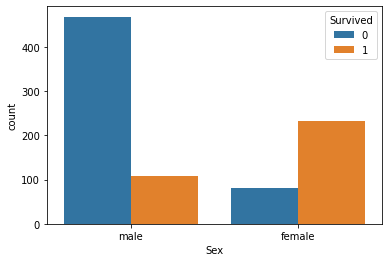

In [14]:
sns.countplot(data=df,x='Sex',hue='Survived')

More than 80% of male commuters died, as compared to around 70% female commuters.

In [15]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'male'

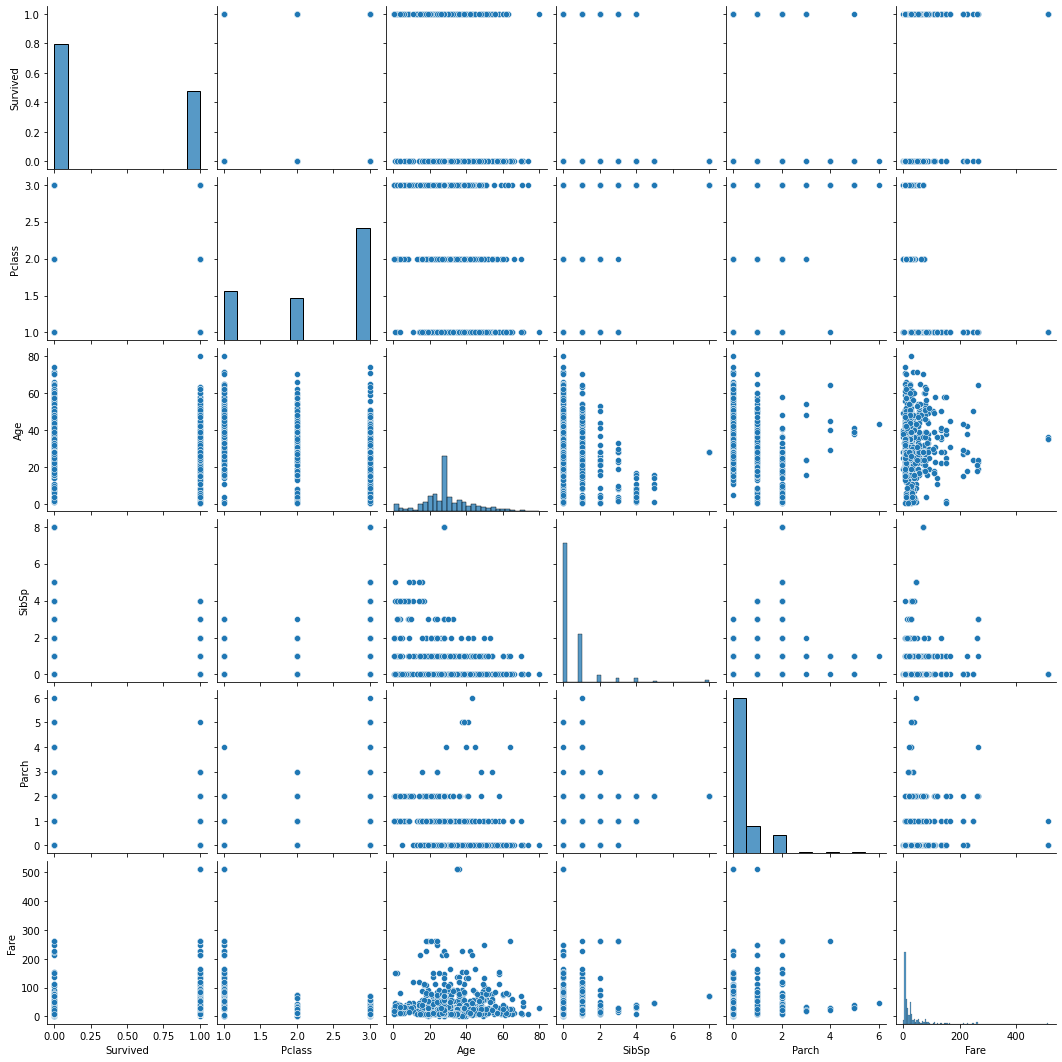

In [16]:
sns.pairplot(df)

## Outlier Detection

<AxesSubplot: >

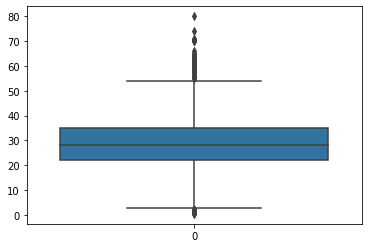

In [17]:
sns.boxplot(df.Age)

In [18]:
upper_limit = df['Age'].mean() + 3* df['Age'].std() # Right from the mean
lower_limit = df['Age'].mean() - 3* df['Age'].std() # Left from the mean
print(upper_limit)
print(lower_limit)

68.42067214450209
-9.697507161337114


In [19]:
quant=df['Age'].quantile(q=[0.75,0.25])

In [20]:
q3=quant.loc[0.75]
q3

35.0

In [21]:
q1=quant.loc[0.25]
q1

22.0

In [22]:
IQR=q3-q1#inter quantile
IQR

13.0

In [23]:
maxwhisker=q3+1.5*IQR
maxwhisker

54.5

In [24]:
minwhisker=q1-1.5*IQR
minwhisker

2.5

In [25]:
df['Age']=np.where(df.Age>54.5,54.5,df.Age)

In [26]:
df['Age']=np.where(df.Age<2.5,2.5,df.Age)

<AxesSubplot: >

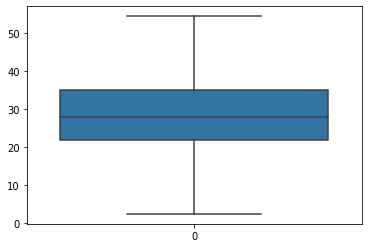

In [27]:
sns.boxplot(df.Age)

<AxesSubplot: >

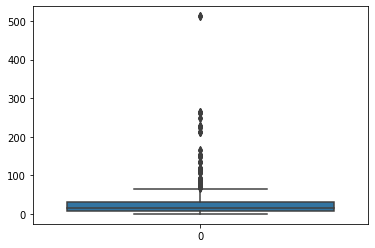

In [28]:
sns.boxplot(df.Fare)

In [29]:
upper_limit = df['Fare'].mean() + 3* df['Fare'].std() # Right from the mean
lower_limit = df['Fare'].mean() - 3* df['Fare'].std() # Left from the mean
print(upper_limit)
print(lower_limit)

181.2844937601173
-116.87607782296804


In [30]:
quant=df['Fare'].quantile(q=[0.75,0.25])

In [31]:
q3=quant.loc[0.75]
q3

31.0

In [32]:
q1=quant.loc[0.25]
q1

7.9104

In [33]:
IQR=q3-q1#inter quantile
IQR

23.0896

In [34]:
maxwhisker=q3+1.5*IQR
maxwhisker

65.6344

In [35]:
minwhisker=q1-1.5*IQR
minwhisker

-26.724

In [36]:
df['Fare']=np.where(df.Fare>65.6344,65.6344,df.Fare)

In [37]:
df['Fare']=np.where(df.Fare<-26.724,-26.724,df.Fare)

<AxesSubplot: >

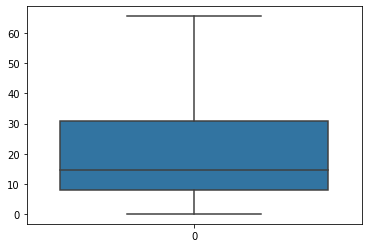

In [38]:
sns.boxplot(df.Fare)

## Spliting dependent and independent variables

In [39]:
x=df.drop(columns=["Survived"],axis=1)
y=df["Survived"]

In [40]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6344,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
x["Sex"].nunique()

2

In [43]:
x["Embarked"].nunique()

3

In [44]:
x["Sex"]=le.fit_transform(x["Sex"])

In [45]:
x["Embarked"]=le.fit_transform(x["Embarked"])

In [46]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,65.6344,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


## Train test split

In [48]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [49]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((623, 7), (623,), (268, 7), (268,))

## Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [51]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [52]:
x_train

array([[-1.5325562 ,  0.72592065,  1.80447949, ..., -0.47299765,
         0.08932336,  0.56011053],
       [-1.5325562 , -1.37756104,  1.63879184, ..., -0.47299765,
         1.98540026, -2.02469583],
       [ 0.84844757,  0.72592065, -2.21344609, ...,  1.93253327,
         1.0765501 ,  0.56011053],
       ...,
       [ 0.84844757,  0.72592065, -0.10092851, ..., -0.47299765,
        -0.82351937, -0.73229265],
       [ 0.84844757, -1.37756104,  0.5618221 , ..., -0.47299765,
        -0.35456483,  0.56011053],
       [-0.34205431,  0.72592065,  2.09443288, ...,  0.72976781,
         0.69330237,  0.56011053]])

In [53]:
x_test

array([[ 0.77963055,  0.76537495, -0.05174687, ..., -0.47809977,
        -0.40150209, -1.76531134],
       [ 0.77963055,  0.76537495, -0.05174687, ..., -0.47809977,
        -0.74607117,  0.63014911],
       [ 0.77963055,  0.76537495, -1.79564727, ...,  0.87064484,
         0.33003698, -0.56758111],
       ...,
       [ 0.77963055,  0.76537495, -0.13478974, ..., -0.47809977,
        -0.40170659, -1.76531134],
       [ 0.77963055, -1.30654916, -0.88217563, ..., -0.47809977,
        -0.74877454,  0.63014911],
       [-1.64991582,  0.76537495, -0.05174687, ..., -0.47809977,
         0.25999892, -1.76531134]])